<a href="https://colab.research.google.com/github/avilagab/Circuits/blob/main/SYS/SYS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#La transformada de Laplace
Recordando que la transformada de Laplace está definida como:

$F(s) = \int_{0}^{\infty} f(t) e^{-st}  dt$

In [ ]:
#La transformada de Laplace
import sympy as sp  #Módulo para manejo de expresions algebráicas
sp.init_printing()

import matplotlib.pyplot as plt
%matplotlib inline

#Creación de símbolos para trabajar más adelante
t, s = sp.symbols('t, s')
a = sp.symbols('a', real=True, positive=True)

##Evaluación directa de las funciones

In [ ]:
#Creación de una función f(t) = e^-at
f = sp.exp(-a*t)
f

 -a⋅t
ℯ    

In [ ]:
#Definición de la función para la transformada de Laplace
f_lap = sp.exp(-s*t)
f_lap

 -s⋅t
ℯ    

In [ ]:
#Evaluación de la integral usando la función "integrate"
sp.integrate(f*f_lap, (t, 0, sp.oo)) #Integral entre 0 e infinito

⎧       1                         π
⎪   ─────────      for │arg(s)│ ≤ ─
⎪     ⎛a    ⎞                     2
⎪   s⋅⎜─ + 1⎟                      
⎪     ⎝s    ⎠                      
⎪                                  
⎨∞                                 
⎪⌠                                 
⎪⎮  -a⋅t  -s⋅t                     
⎪⎮ ℯ    ⋅ℯ     dt     otherwise    
⎪⌡                                 
⎪0                                 
⎩                                  

In [ ]:
#En vez de hacer la integral, operar directamente con laplace_transform
F = sp.laplace_transform(f, t, s, noconds=True) #sin condiciones
F

  1  
─────
a + s

Se puede definir una función para hacer la transformada de Laplace y su transformada inversa de forma más práctica:

In [ ]:
#Función para realizar la transformada de f(t)
def L(f):
  return sp.laplace_transform(f, t, s, noconds=True)

#Función para realizar la transformada inversa de F(s)
def invL(F):
  return sp.inverse_laplace_transform(F, s, t)

In [ ]:
L(f)

  1  
─────
a + s

In [ ]:
invL(F)

 -a⋅t     
ℯ    ⋅θ(t)

El resultado incluye $θ$(t), que corresponde a la función escalón unitario (teniendo en cuenta condiciones iniciales iguales a cero).

In [ ]:
sp.Heaviside(t)

θ(t)

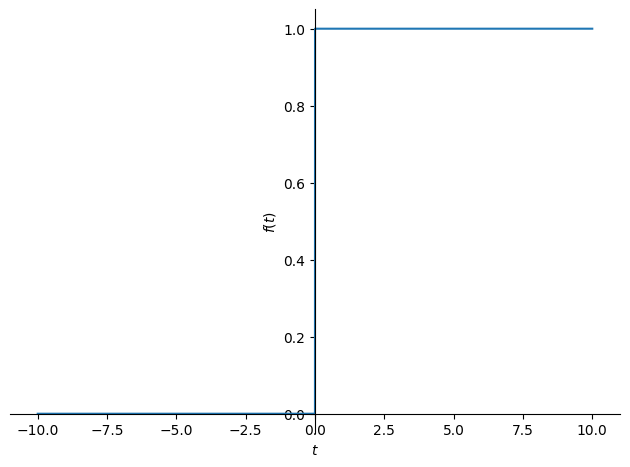

In [ ]:
sp.plot(sp.Heaviside(t))

In [ ]:
#Dándole valor al parámetro 'a' y sacando nuevamente la inversa de la función:
invL(F).subs({a: 2})

 -2⋅t     
ℯ    ⋅θ(t)

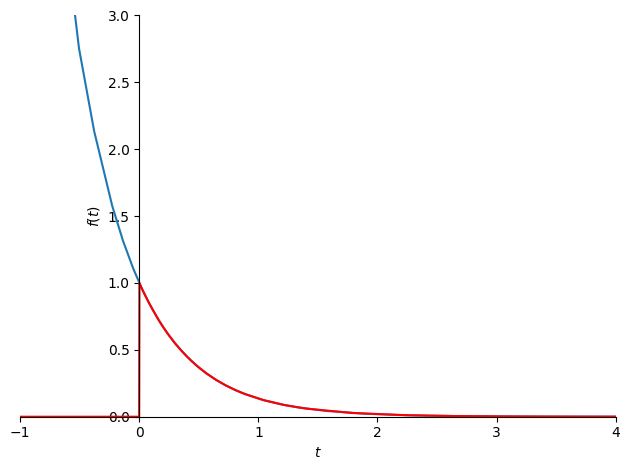

In [ ]:
p = sp.plot(f.subs({a: 2}), invL(F).subs({a: 2}),
            xlim=(-1,4), ylim=(0,3), show=False)
p[1].line_color = 'red'
p.show()

In [ ]:
omega = sp.Symbol('omega', real=True)
exp = sp.exp
sin = sp.sin
cos = sp.cos
functions = [1,
            t,
            exp(-a*t),
            t * exp(-a*t),
            sin(omega*t),
            cos(omega*t),
            1 - exp(-a*t),
            exp(-a*t)*sin(omega*t),
            exp(-a*t)*cos(omega*t)
]
functions

⎡       -a⋅t     -a⋅t                           -a⋅t   -a⋅t            -a⋅t   
⎣1, t, ℯ    , t⋅ℯ    , sin(ω⋅t), cos(ω⋅t), 1 - ℯ    , ℯ    ⋅sin(ω⋅t), ℯ    ⋅co

      ⎤
s(ω⋅t)⎦

In [ ]:
Fs = [L(f) for f in functions]
Fs

⎡1  1     1       1         ω        s         1     1        ω            a +
⎢─, ──, ─────, ────────, ───────, ───────, - ───── + ─, ─────────────, ───────
⎢s   2  a + s         2   2    2   2    2    a + s   s   2          2   2     
⎣   s          (a + s)   ω  + s   ω  + s                ω  + (a + s)   ω  + (a

 s    ⎤
──────⎥
     2⎥
 + s) ⎦

#Funciones más complejas
Las funciones presentadas previamente permiten ser usadas para funcionas más complejas de F(s).

In [ ]:
F = 2*s/(s+5)
F

 2⋅s 
─────
s + 5

In [ ]:
F.apart(s)

      10 
2 - ─────
    s + 5

In [ ]:
funcion = invL(F)
funcion

             -5⋅t     
2⋅δ(t) - 10⋅ℯ    ⋅θ(t)

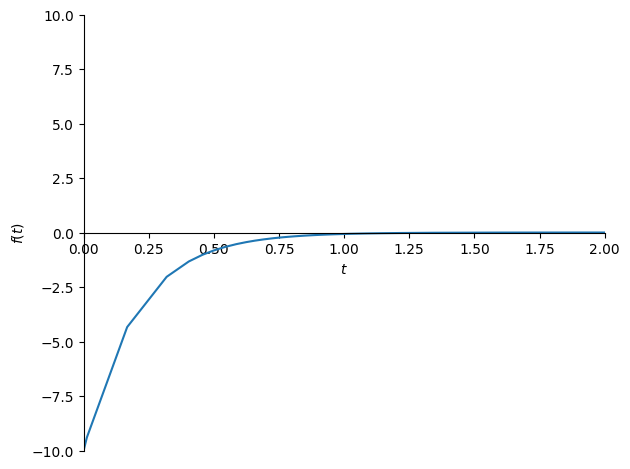

In [ ]:
p = sp.plot(funcion, xlim=(0,2), ylim=(-10,10), show=False)
p.show()

# Uso de Laplace para el análisis:
Adaptados de: https://docs.sympy.org/latest/modules/physics/control/control_plots.html

In [ ]:
#FUNCIÓN DE TRANSFERENCIA DE PRUEBA
#F_NUM = ( 8*s**2 + 18*s + 32 )
F_NUM = 2*s

#F_DEN = ( s**3 + 6*s**2 + 14*s + 24 )
F_DEN = (s+5)


F = F_NUM / F_DEN
F

 2⋅s 
─────
s + 5

## Diagrama de Bode
Representación en magnitud y fase de la función de transferencia

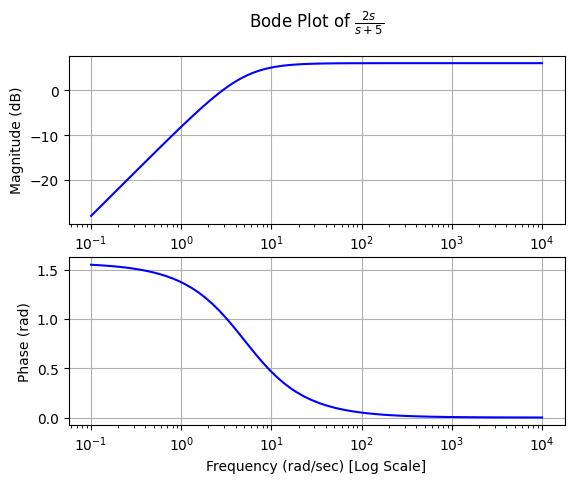

'Solo fase\n\nfrom sympy.physics.control.control_plots import bode_phase_plot\n#bode_phase_plot(tf1, initial_exp=0, final_exp=5)'

In [ ]:
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import bode_plot
tf1 = TransferFunction(F_NUM, F_DEN, s)
bode_plot(tf1, initial_exp=-1, final_exp=4)

'''Solo magnitud
from sympy.physics.control.control_plots import bode_magnitude_plot
bode_magnitude_plot(tf1, initial_exp=0, final_exp=5)'''
'''Solo fase

from sympy.physics.control.control_plots import bode_phase_plot
#bode_phase_plot(tf1, initial_exp=0, final_exp=5)'''

## Polos y ceros
Una gráfica de polos y ceros es una representación del sistema en el plano complejo. Los círculos representan en este caso los ceros y las x los polos.

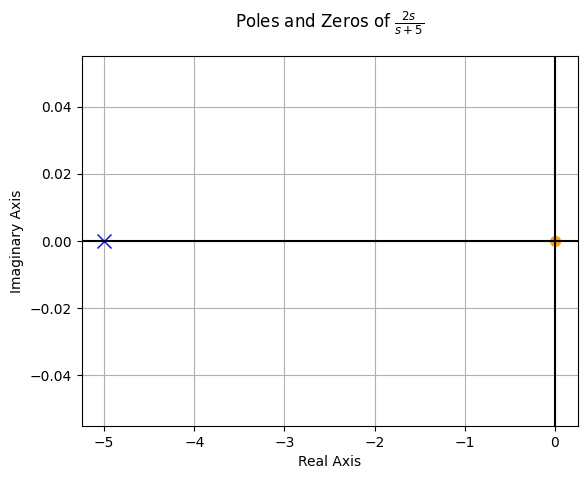

In [ ]:
#VISUALIZACIÓN DE POLOS Y CEROS

from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
tf1 = TransferFunction(F_NUM, F_DEN, s)
pole_zero_plot(tf1)

In [ ]:
pole_zero_numerical_data(tf1)

NameError: ignored

## Respuesta del sistema al impulso

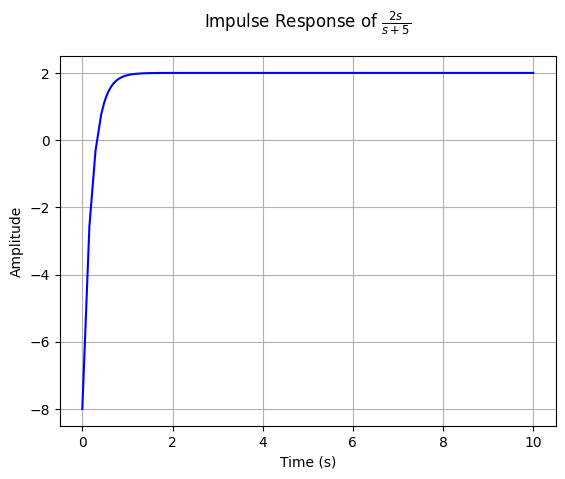

In [ ]:
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import impulse_response_plot
tf1 = TransferFunction(F_NUM, F_DEN, s)
impulse_response_plot(tf1)  #Visualizar el comportamiento de la función de transferencia

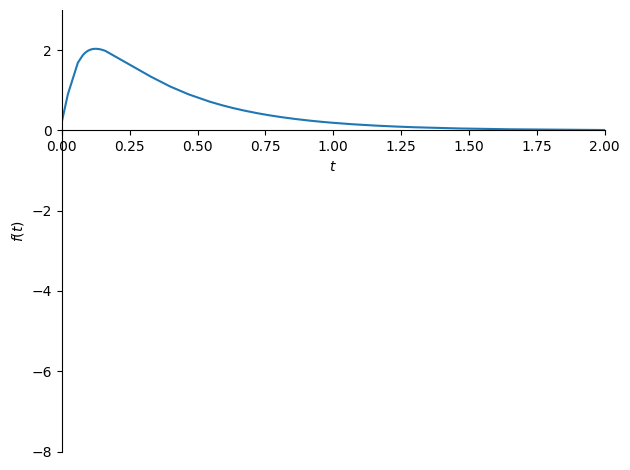

In [ ]:
# Transformada inversa de la función de transferencia
funcion = invL(F)
p = sp.plot(funcion, xlim=(0, 2), ylim=(-8, 3), show=False)
p.show()

## Respuesta del sistema al escalón unitario

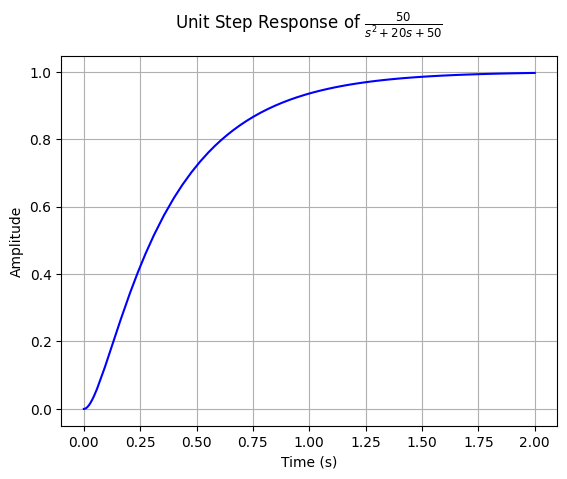

In [ ]:
from sympy.physics.control.control_plots import step_response_plot
tf1 = TransferFunction(F_NUM, F_DEN, s)
step_response_plot(tf1, upper_limit=2)